In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, norm
import seaborn as sns

In [ ]:
path_antoine = "/Users/antoine.gilson/Desktop/The-Design-and-Analysis-of-Benchmark-Experiments/Plots/"

In [ ]:
beta2_values = np.linspace(0, 0.16, 9)
M = [150,200,500,1000,2000]

### Introduction, variables, training and test sets

In [ ]:
def print_training_test_sets(n=150, m=2000, seed=42): # Vérifier que la distributon de nos lois est bien la bonne

    np.random.seed(seed)
    
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    # Création de la figure avec subplots
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plotting X Training set
    ax[0, 0].scatter(np.arange(n), x_train, label="X Training set n = 150", color="blue", s=10)
    ax[0, 0].set_title("Training Set X")
    ax[0, 0].set_xlabel("Index")
    ax[0, 0].set_ylabel("Value")
    ax[0, 0].legend()
    ax[0, 0].grid()

    # Plotting X Test set
    ax[0, 1].scatter(np.arange(n, n + m), x_test, label="X Test set m = 150", color="red", s=10)
    ax[0, 1].set_title("Test Set X")
    ax[0, 1].set_xlabel("Index")
    ax[0, 1].set_ylabel("Value")
    ax[0, 1].legend()
    ax[0, 1].grid()

    # Plotting Epsilon Training set
    ax[1, 0].scatter(np.arange(n), epsilon_train, label="Epsilon Training set n = 150", color="green", s=10)
    ax[1, 0].set_title("Training Set Epsilon")
    ax[1, 0].set_xlabel("Index")
    ax[1, 0].set_ylabel("Value")
    ax[1, 0].legend()
    ax[1, 0].grid()

    # Plotting Epsilon Test set
    ax[1, 1].scatter(np.arange(n, n + m), epsilon_test, label="Epsilon Test set m = 150", color="orange", s=10)
    ax[1, 1].set_title("Test Set Epsilon")
    ax[1, 1].set_xlabel("Index")
    ax[1, 1].set_ylabel("Value")
    ax[1, 1].legend()
    ax[1, 1].grid()

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), x_train, label = "X Training set n = 150", color = "blue", s = 8)
    plt.scatter(np.arange(n, n+m), x_test, label = "X Test set m = 150", color = "red", s = 8)
    plt.xlabel("Point de l'ensemble de test ou d'entrainement")
    plt.ylabel("Valeur de X")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), epsilon_train, label = "Eps Training set n = 150", color = "green", s = 8)
    plt.scatter(np.arange(n, n+m), epsilon_test, label = "Eps Test set m = 150", color = "orange", s = 8)
    plt.xlabel("Point de l'ensemble de test ou d'entrainement")
    plt.ylabel("Valeur de Epsilon")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def print_training_test_sets_hist(n=150, m=2000, seed=42): # vérifier que la distribution de nos lois est bien la bonne, histogramme
    np.random.seed(seed)
    
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    x_vals = np.linspace(0, 5, 100)
    epsilon_vals = np.linspace(-4, 4, 100)

    plt.figure()
    plt.title("Distribution de X")
    plt.hist(x_train, bins=30, label="X Training set n_train = 150", color="blue", edgecolor='black', alpha=0.7, density=True)
    plt.hist(x_test, bins=30, label="X Test set n_test = 2000", color="red", edgecolor='black', alpha=0.7, density=True)
    plt.plot(x_vals, uniform.pdf(x_vals, 0, 5), 'k-', label="Uniform(0, 5)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.title("Distribution de epsilon")
    plt.hist(epsilon_train, bins=30, label="Eps Training set n_train = 150", color="green", edgecolor='black', alpha=0.7, density=True)
    plt.hist(epsilon_test, bins=30, label="Eps Test set m_train = 2000", color="orange", edgecolor='black', alpha=0.7, density=True)
    plt.plot(epsilon_vals, norm.pdf(epsilon_vals, 0, 1), 'k-', label="Normal(0, 1)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
def print_training_test_sets_2(n=150, m=2000, seed = 42): # ensemble x_train, y_train

    np.random.seed(seed)
    beta1 = 2
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]   

    for beta2 in beta2_values:

          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test
          y = beta1 * x + beta2 * x**2 + epsilon

          plt.figure()
          plt.title("ratio")
          plt.plot(x[np.argsort(x)],y[np.argsort(x)], label ="tout y", color = "black")
          plt.plot(x_train[np.argsort(x_train)],y_train[np.argsort(x_train)], label ="ensembe d'entrainement", color = "yellow")
          plt.grid()
          plt.legend()
          plt.show()

          plt.figure()
          plt.title("ratio")
          plt.plot(x[np.argsort(x)],y[np.argsort(x)], label ="tout y", color = "black")
          plt.plot(x_test[np.argsort(x_test)],y_test[np.argsort(x_test)], label ="ensembe d'entrainement", color = "green")
          plt.grid()
          plt.legend()
          plt.show()


In [ ]:
def print_training_test_sets_3(): # Modèles fitted
    
      n = 150
      m = 2000

      np.random.seed(42)
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in [1]:
            
          
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2

          coef_a = model_a.coef_[0]
          intercept_a = model_a.intercept_     
        
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          coef_b = model_b.coef_
          intercept_b = model_b.intercept_

          y = beta1*x + beta2*x**2 +epsilon 
          eq_a = intercept_a + coef_a * x
          eq_a_train = intercept_a + coef_a * x_train
          eq_a_test = intercept_a + coef_a * x_test
          eq_b = intercept_b + coef_b[0] * x + coef_b[1] * x**2
          eq_b_train = intercept_b + coef_b[0] * x_train + coef_b[1] * x_train**2
          eq_b_test = intercept_b + coef_b[0] * x_test + coef_b[1] * x_test**2

          plt.figure() # Fits des modèles 
          plt.title("Fits d'entrainement des modèles pour " f"beta2 = {beta2}" " et pour "f"n_train= {n}" )  
          plt.plot(x_train[np.argsort(x_train)], y_train[np.argsort(x_train)], label = "Y réel", color = "green")
          plt.plot(x_train[np.argsort(x_train)], eq_a_train[np.argsort(x_train)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x_train[np.argsort(x_train)], eq_b_train[np.argsort(x_train)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()     


          plt.figure() # Fits des modèles 
          plt.title("Fits de test des modèles pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )  
          plt.plot(x_test[np.argsort(x_test)], y_test[np.argsort(x_test)], label = "Y réel", color = "green")
          plt.plot(x_test[np.argsort(x_test)], eq_a_test[np.argsort(x_test)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x_test[np.argsort(x_test)], eq_b_test[np.argsort(x_test)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()  

          plt.figure() # Fits des modèles 
          plt.title("Fits des modèles pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )  
          plt.plot(x[np.argsort(x)], y[np.argsort(x)], label = "Y réel", color = "green")
          plt.plot(x[np.argsort(x)], eq_a[np.argsort(x)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x[np.argsort(x)], eq_b[np.argsort(x)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()  

### Graphical approach of model precision and errors

In [ ]:
def performances_metrics_boxplot():
    np.random.seed(42)
    n = 150
    M = [150, 200, 500, 1000, 2000]
    beta1 = 2


    for m in M:

        x = np.random.uniform(0, 5, n + m)
        x_train = x[:n]

        epsilon = np.random.normal(0, 1, n + m)
        epsilon_train = epsilon[:n]
        x_test = x[n:n + m]
        epsilon_test = epsilon[n:n + m]

        for beta2 in beta2_values:
            y = beta1 * x + beta2 * x**2 + epsilon
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
            y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

            # Linear Model : A
            model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a = model_a.predict(x_test.reshape(-1, 1))
            pa = (y_test - y_pred_a)**2

            # Quadratic Model : B
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))

            model_b = LinearRegression().fit(x_train_quad, y_train)
            y_pred_b = model_b.predict(x_test_quad)
            pb = (y_test - y_pred_b)**2

            differences = pa - pb

            plt.figure(figsize=(10, 6))
            plt.title(f"pa - pb  pour beta2 = {beta2} et pour n_test= {m}")

            # Scatter plot des différences
            sns.scatterplot(x=x_test, y=differences, color="red", s=6, label=f"Differences pour beta2 = {beta2} et pour n_test = {m}")
            plt.axhline(y=0, color='black', linestyle='--', label='y = 0')

            # Ajouter les données pour le boxplot
            box = plt.boxplot(differences, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                              boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                              medianprops=dict(color='yellow'),
                              whiskerprops=dict(color='blue'),
                              capprops=dict(color='blue'),
                              flierprops=dict(color='blue', markeredgecolor='blue'))

            # Récupérer les valeurs des whiskers et des quartiles
            whisker_min = box['whiskers'][0].get_ydata()[1]
            whisker_max = box['whiskers'][1].get_ydata()[1]
            q1 = box['boxes'][0].get_path().vertices[0, 1]
            median = box['medians'][0].get_ydata()[0]
            q3 = box['boxes'][0].get_path().vertices[2, 1]

            # Annoter les valeurs sur le graphique
            plt.text(max(x_test) + 1, whisker_min, f'Whisker Min: {whisker_min:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, whisker_max, f'Whisker Max: {whisker_max:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')

            plt.xlabel("X test set")
            plt.ylabel("Differences")
            plt.grid()
            plt.legend()

            filename = f"{path_antoine}/Erreurs/ModeleB/CondToX/plot_m_{m}_beta2_{beta2}.png"
            plt.savefig(filename)

            plt.show()


In [ ]:
def performance_metrics_hist():
    
    n = 150

    M = [150, 200, 500, 1000, 2000]

    for m in M:

      np.random.seed(42)
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in [0, 0.2, 0.4, 0.6, 0.6, 0.1, 0.12, 0.14, 0.16, 0.3, 0.5, 1]:
            
          
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2

          coef_a = model_a.coef_[0]
          intercept_a = model_a.intercept_     
        
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          coef_b = model_b.coef_
          intercept_b = model_b.intercept_

          differences = pa - pb

          plt.figure() # Erreur individuelle des modèles
          plt.title("prédiction du modèle linéaire pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" ) 
          plt.hist(pa, bins=30, label=f"pa = (y - ya)^2 pour beta2 = {beta2} et pour n_test = {m}", color="red", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          filename = f"{path_antoine}/Erreurs/ModeleA/Frequency/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)
          plt.show()

          plt.figure()
          plt.title("prédiction du modèle quadratique pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )       
          plt.hist(pb, bins=30, label=f"pb = (y - yb)^2 pour beta2 = {beta2} et pour n_test = {m}", color="orange", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          filename = f"{path_antoine}/Erreurs/ModeleB/Frequency/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)
          plt.show()

          plt.figure()
          plt.title("Différence de prédiction des modèles " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )        
          plt.hist(differences, bins=30, label=f"pa - pb pour beta2 = {beta2} et pour n_test = {m}", color="blue", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          filename = f"{path_antoine}/Erreurs/Differences/Frequency/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)
          plt.show()

          """

          y = beta1*x + beta2*x**2 +epsilon 
          eq_a = intercept_a + coef_a * x
          eq_a_train = intercept_a + coef_a * x_train
          eq_a_test = intercept_a + coef_a * x_test
          eq_b = intercept_b + coef_b[0] * x + coef_b[1] * x**2
          eq_b_train = intercept_b + coef_b[0] * x_train + coef_b[1] * x_train**2
          eq_b_test = intercept_b + coef_b[0] * x_test + coef_b[1] * x_test**2

          plt.figure() # Fits des modèles 
          plt.title("Fits d'entrainement du modèle quadratique pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )  
          plt.plot(x[np.argsort(x)], y[np.argsort(x)], label = "Y réel", color = "green")
          plt.plot(x[np.argsort(x)], eq_a[np.argsort(x)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x[np.argsort(x)], eq_b[np.argsort(x)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          filename = f"{path_antoine}/Fits/Continuous/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)
          plt.show()   
          """  

### MSE

In [ ]:
def MSE():
    
    n = 150
    m = 2000

    np.random.seed(42)
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    mse_A = []
    mse_B = []
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

         # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))

        mse_A.append(mean_squared_error(y_pred_a, y_test))
    
          # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        mse_B.append(mean_squared_error(y_pred_b, y_test))

    plt.figure()
    plt.title("Différence des MSE")
    plt.plot(beta2_values, mse_A, label = "MSE_A")
    plt.plot(beta2_values, mse_B, label = "MSE_B")
       
    plt.grid()
    plt.legend()
    plt.show()

### Descriptive Statistics, data

In [ ]:
def descriptive_statistics():
    
    n = 150

    M = [150, 200, 500, 1000, 2000]

    empirical_means_A = []
    standard_deviations_A = []
    medians_A = []
    Q1_A = []
    Q3_A = []
    IQR_A = []

    empirical_means_B = []
    standard_deviations_B = []
    medians_B = []
    Q1_B = []
    Q3_B = []
    IQR_B = []

    for m in M:

      a = []
      b = []
      c = []
      d = []
      q = []
      iqr = []

      e = []
      f = []
      g = []
      h = []
      q_ = []
      iqr_ = []


      np.random.seed(42)
      beta1 = 2
      beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          mean_a = sum(pa)/m
          mean_b = sum(pb)/m

          a.append(mean_a)
          e.append(mean_b)

          std_a = np.std(pa, ddof=1)
          std_b = np.std(pb, ddof = 1)

          b.append(std_a)
          f.append(std_b)

          q1_a = np.percentile(pa, 25)
          med_a = np.percentile(pa, 50)        
          q3_a = np.percentile(pa, 75)

          q1_b = np.percentile(pb, 25)
          med_b = np.percentile(pb, 50)        
          q3_b = np.percentile(pb, 75)

          c.append(med_a)
          g.append(med_b)
          d.append(q1_a)
          q.append(q3_a)
          h.append(q1_b)
          q_.append(q3_b)

          iqr.append(q3_a - q1_a)
          iqr_.append(q3_b - q1_b)

      empirical_means_A.append(a)
      empirical_means_B.append(e)
      standard_deviations_A.append(b)
      standard_deviations_B.append(f)
      medians_A.append(c)
      medians_B.append(g)
      Q1_A.append(d)
      Q1_B.append(h)
      Q3_A.append(q)
      Q3_B.append(q_)
      IQR_A.append(iqr)
      IQR_B.append(iqr_)

    return empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B


empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()

In [ ]:
def create_data():
    
    M = [150, 200, 500, 1000, 2000]
    
    empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()
    
    
    data_A_all = {
    "Empirical Mean": empirical_means_A,
    "Standard Deviation": standard_deviations_A,
    "Median": medians_A,
    "Q1": Q1_A,
    "Q3": Q3_A,
    "IQR": IQR_A
   }

    stats_A_all = pd.DataFrame(data_A_all, index=M)

    data_B_all = {
    "Empirical Mean": empirical_means_B,
    "Standard Deviation": standard_deviations_B,
    "Median": medians_B,
    "Q1": Q1_B,
    "Q3": Q3_B,
    "IQR": IQR_B
   }

    stats_B_all = pd.DataFrame(data_B_all, index=M)

    df_empirical_means_A = pd.DataFrame(empirical_means_A, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_A = pd.DataFrame(standard_deviations_A, index=M, columns=beta2_values).transpose()
    df_medians_A = pd.DataFrame(medians_A, index=M, columns=beta2_values).transpose()
    df_Q1_A = pd.DataFrame(Q1_A, index=M, columns=beta2_values).transpose()
    df_Q3_A = pd.DataFrame(Q3_A, index=M, columns=beta2_values).transpose()
    df_IQR_A = pd.DataFrame(IQR_A, index=M, columns=beta2_values).transpose()

    df_empirical_means_B = pd.DataFrame(empirical_means_B, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_B = pd.DataFrame(standard_deviations_B, index=M, columns=beta2_values).transpose()
    df_medians_B = pd.DataFrame(medians_B, index=M, columns=beta2_values).transpose()
    df_Q1_B = pd.DataFrame(Q1_B, index=M, columns=beta2_values).transpose()
    df_Q3_B = pd.DataFrame(Q3_B, index=M, columns=beta2_values).transpose()
    df_IQR_B = pd.DataFrame(IQR_B, index=M, columns=beta2_values).transpose()    

    return stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, \
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B


(stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

### First shot looking at our Standard deviations

varying beta2

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Premier subplot : Comparaison des valeurs de deviations standard selon beta2
axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_A[2000], label="std error A", color = "black")
axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_B[2000], label="std error B", color = "yellow")
axs[0, 0].set_title("Comparaison des valeurs de deviations standard selon beta2")
axs[0, 0].grid()
axs[0, 0].legend()

# Deuxième subplot : Quartiles de l'erreur selon le modèle
axs[0, 1].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[0, 1].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[0, 1].plot(beta2_values, df_medians_A[2000], label="median error A")
axs[0, 1].plot(beta2_values, df_medians_B[2000], label="median error B")
axs[0, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A")
axs[0, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B")
axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
axs[0, 1].grid()
axs[0, 1].legend()

# Troisième subplot : Quartiles Q1 de l'erreur selon le modèle
axs[1, 0].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[1, 0].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[1, 0].set_title("Quartiles Q1 de l'erreur selon le modèle")
axs[1, 0].grid()
axs[1, 0].legend()

# Quatrième subplot : Quartiles Q3 de l'erreur selon le modèle
axs[1, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A", color = "purple")
axs[1, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B", color = "brown")
axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()


varying n_test

In [ ]:
beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16

df1 = df_empirical_standard_deviations_A.loc[beta2_1]
df2 = df_empirical_standard_deviations_A.loc[beta2_2]
df3 = df_empirical_standard_deviations_A.loc[beta2_3]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Premier subplot : Comparaison des valeurs de deviations standard selon beta2
axs[0, 0].plot(M, df1, label="std error A, beta2 = 0", color = "black")
axs[0, 0].plot(M, df2, label="std error A beta2 = 0.08", color = "yellow")
axs[0, 0].plot(M, df3, label="std error A, beta2 = 0.16", color = "red")
axs[0, 0].set_title("Comparaison des valeurs de deviations standard selon n_test")
axs[0, 0].grid()
axs[0, 0].legend()

df1 = df_medians_A.loc[beta2_1]
df2 = df_medians_A.loc[beta2_2]
df3 = df_medians_A.loc[beta2_3]
df4 = df_Q1_A.loc[beta2_1]
df5 = df_Q1_A.loc[beta2_2]
df6 = df_Q1_A.loc[beta2_3]
df7 = df_Q3_A.loc[beta2_1]
df8 = df_Q3_A.loc[beta2_2]
df9 = df_Q3_A.loc[beta2_3]


# Deuxième subplot : Quartiles de l'erreur selon le modèle
axs[0, 1].plot(M, df4, label="Q1 error A, beta = 0")
axs[0, 1].plot(M, df5, label="Q1 error A, beta = 0.08")
axs[0, 1].plot(M, df6, label="Q1 error A, beta = 1")
axs[0, 1].plot(M, df1, label="median error A, beta = 0")
axs[0, 1].plot(M, df2, label="median error A, beta = 0.08")
axs[0, 1].plot(M, df3, label="median error A, beta = 1")
axs[0, 1].plot(M, df7, label="Q3 error A, beta = 0")
axs[0, 1].plot(M, df8, label="Q3 error A, beta = 0.08")
axs[0, 1].plot(M, df9, label="Q3 error A, beta = 1")
axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
axs[0, 1].grid()
axs[0, 1].legend()

# Troisième subplot : Quartiles Q1 de l'erreur selon le modèle
axs[1, 0].plot(M, df4, label="Q1 error A, beta = 0")
axs[1, 0].plot(M, df5, label="Q1 error A, beta = 0.08")
axs[1, 0].plot(M, df6, label="Q1 error A, beta = 1")
axs[1, 0].set_title("Quartiles Q1 de l'erreur selon betae")
axs[1, 0].grid()
axs[1, 0].legend()

# Quatrième subplot : Quartiles Q3 de l'erreur selon le modèle
axs[1, 1].plot(M, df7, label="Q3 error A, beta = 0")
axs[1, 1].plot(M, df8, label="Q3 error A, beta = 0.08")
axs[1, 1].plot(M, df9, label="Q3 error A, beta = 1")
axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt # pareil pour B

beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16

df1 = df_empirical_standard_deviations_B.loc[beta2_1]
df2 = df_empirical_standard_deviations_B.loc[beta2_2]
df3 = df_empirical_standard_deviations_B.loc[beta2_3]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Premier subplot : Comparaison des valeurs de deviations standard selon beta2
axs[0, 0].plot(M, df1, label="std error B, beta2 = 0", color = "black")
axs[0, 0].plot(M, df2, label="std error B beta2 = 0.08", color = "yellow")
axs[0, 0].plot(M, df3, label="std error B, beta2 = 0.16", color = "red")
axs[0, 0].set_title("Comparaison des valeurs de deviations standard selon n_test")
axs[0, 0].grid()
axs[0, 0].legend()

df1 = df_medians_B.loc[beta2_1]
df2 = df_medians_B.loc[beta2_2]
df3 = df_medians_B.loc[beta2_3]
df4 = df_Q1_B.loc[beta2_1]
df5 = df_Q1_B.loc[beta2_2]
df6 = df_Q1_B.loc[beta2_3]
df7 = df_Q3_B.loc[beta2_1]
df8 = df_Q3_B.loc[beta2_2]
df9 = df_Q3_B.loc[beta2_3]

# Deuxième subplot : Quartiles de l'erreur selon le modèle
axs[0, 1].plot(M, df4, label="Q1 error B, beta = 0")
axs[0, 1].plot(M, df5, label="Q1 error B, beta = 0.08")
axs[0, 1].plot(M, df6, label="Q1 error B, beta = 1")
axs[0, 1].plot(M, df1, label="median error B, beta = 0")
axs[0, 1].plot(M, df2, label="median error B, beta = 0.08")
axs[0, 1].plot(M, df3, label="median error B, beta = 1")
axs[0, 1].plot(M, df7, label="Q3 error B, beta = 0")
axs[0, 1].plot(M, df8, label="Q3 error B, beta = 0.08")
axs[0, 1].plot(M, df9, label="Q3 error B, beta = 1")
axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
axs[0, 1].grid()
axs[0, 1].legend()

# Troisième subplot : Quartiles Q1 de l'erreur selon le modèle
axs[1, 0].plot(M, df4, label="Q1 error B, beta = 0")
axs[1, 0].plot(M, df5, label="Q1 error B, beta = 0.08")
axs[1, 0].plot(M, df6, label="Q1 error B, beta = 1")
axs[1, 0].set_title("Quartiles Q1 de l'erreur selon betae")
axs[1, 0].grid()
axs[1, 0].legend()

# Quatrième subplot : Quartiles Q3 de l'erreur selon le modèle
axs[1, 1].plot(M, df7, label="Q3 error B, beta = 0")
axs[1, 1].plot(M, df8, label="Q3 error B, beta = 0.08")
axs[1, 1].plot(M, df9, label="Q3 error B, beta = 1")
axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()


### Inferential statistics

We already have the standard error of the mean (according to m and beta2), that gives us a first information of the precisation of mA

Derive formulas (or algorithms) for the standard error (SE) of the mean

Methods: 
- parametric estimates (consider different cases when n is small versus large and when VA is assumed to be Gaussian or not)
- bootstrap estimates

### 1 - Parametric estimates

### when n_test is large

In [ ]:
def divide_by_sqrt(df):
    return df.apply(lambda x: x / np.sqrt(x.name), axis=0)

def standard_error_m_large():

    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

    df_standard_error_A = divide_by_sqrt(df_empirical_standard_deviations_A)
    df_standard_error_B = divide_by_sqrt(df_empirical_standard_deviations_B)

    return df_standard_error_A, df_standard_error_B


df_standard_error_A, df_standard_error_B = standard_error_m_large()

### when n_test is small

### n_test is small and residual is not gaussian

### 2 / Non parametric estimates - Bootstrap estimates

### bootstrap on test sample

In [ ]:
def standard_error_bootstrap_test():
   
   n = 150
   np.random.seed(42)

   M = [150, 200, 500, 1000, 2000]

   B = 250

   se_bootstrap_A = []
   se_bootstrap_B = []

   for m in M:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      epsilon_train = epsilon[:n]
      x_train_quad = np.column_stack((x_train, x_train**2))
      bootstrap_indices = np.random.choice(m, size=(B, m), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
         
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (m**0.5)
               seb = np.std(pb, ddof = 1) / (m**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

### bootstrap on train sample (pas utile pour l'instant)

In [ ]:
def se_each_bootstrap(n, B, m):

    np.random.seed(42)

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       

           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (n**0.5)
           seb = np.std(pb, ddof = 1) / (n**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     


def standard_error_bootstrap_train():

   M = [50, 100, 150, 200, 500, 1000, 2000]

   liste_se_bootstrap_A = []
   liste_se_bootstrap_B = []

   for m in M:

      se_bootstrap_A, se_bootstrap_B = se_each_bootstrap(150,250,m)

      liste_se_bootstrap_A.append(se_bootstrap_A)
      liste_se_bootstrap_B.append(se_bootstrap_B)

   df_se_bootstrap_A_train = pd.DataFrame(liste_se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B_train = pd.DataFrame(liste_se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A_train, df_se_bootstrap_B_train

In [ ]:
df_se_bootstrap_A_test, df_se_bootstrap_B_test = standard_error_bootstrap_test() 
df_standard_error_A, df_standard_error_B = standard_error_m_large()

In [ ]:
# Première figure : Comparaison des valeurs d'erreur standard obtenues selon la méthode
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(beta2_values, df_standard_error_A[2000], label="Méthode paramétrique", color="blue")
ax1.plot(beta2_values, df_se_bootstrap_A_test[2000], label="Méthode bootstrap sur ensemble de test", color="red")
ax1.set_title("Erreur standard pour A selon la méthode")
ax1.grid()
ax1.legend()

# Sauvegarde ou affichage de la première figure
plt.tight_layout()
plt.show()

# Deuxième figure : Comparaison des valeurs d'erreur standard selon le bootstrapping
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(beta2_values, df_standard_error_A[2000], label="Méthode paramétrique A", color="blue")
ax2.plot(beta2_values, df_se_bootstrap_A_test[2000], label="Méthode bootstrap A sur ensemble de test", color="red")
ax2.plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique B", color="darkblue")
ax2.plot(beta2_values, df_se_bootstrap_B_test[2000], label="Méthode bootstrap B sur ensemble de test", color="darkred")
ax2.set_xlabel("beta2")
ax2.set_ylabel("standard error")
ax2.set_title("Erreur standard pour A et B")
ax2.grid()
ax2.legend()

# Sauvegarde ou affichage de la deuxième figure
plt.tight_layout()
plt.show()


In [ ]:
beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16

df1 = df_standard_error_A.loc[beta2_1]
df2 = df_standard_error_A.loc[beta2_2]
df3 = df_standard_error_A.loc[beta2_3]
df4 = df_se_bootstrap_A_test.loc[beta2_1]
df5 = df_se_bootstrap_A_test.loc[beta2_2]
df6 = df_se_bootstrap_A_test.loc[beta2_3]

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = "  f'{beta2_1}', color = "lightblue")
plt.plot(df4.index, df4.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_1}', color = "darkblue")
plt.plot(df2.index, df2.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = " f'{beta2_2}', color = "red")
plt.plot(df5.index, df5.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(df3.index, df3.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = " f'{beta2_3}', color = "lightgreen")
plt.plot(df6.index, df6.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.xlabel("n_test")
plt.title(f'erreur standard du modèle linéaire pour beta2 = {beta2_1}, {beta2_2}, {beta2_3}')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Subsets of training sets (varying k)

In [ ]:
def standard_error_varying_test_derived():

    liste_subsets = [150,200,500,1000,2000]

    n = 150
    m = 2000
    standard_errors_A = []
    standard_errors_B = []
    np.random.seed(42)
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    for k in liste_subsets:

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      liste_A = []
      liste_B = []
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          se_a = np.std(pa, ddof=1)/(k**0.5)
          se_b = np.std(pb, ddof = 1)/(k**0.5)

          liste_A.append(se_a)
          liste_B.append(se_b)

      standard_errors_A.append(liste_A)
      standard_errors_B.append(liste_B)

    df_se_varying_k_A = pd.DataFrame(standard_errors_A, index=liste_subsets, columns=beta2_values).transpose()
    df_se_varying_k_B = pd.DataFrame(standard_errors_B, index=liste_subsets, columns=beta2_values).transpose()

    return df_se_varying_k_A, df_se_varying_k_B


df_se_varying_k_A, df_se_varying_k_B = standard_error_varying_test_derived()

In [ ]:
list_subsets = [150,200,500,1000,2000]
beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16

df1 = df_se_varying_k_A.loc[beta2_1]
df2 = df_se_varying_k_A.loc[beta2_2]
df3 = df_se_varying_k_A.loc[beta2_3]

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = "  f'{beta2_1}', color = "lightblue")
plt.plot(df2.index, df2.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = " f'{beta2_2}', color = "red")
plt.plot(df3.index, df3.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = " f'{beta2_3}', color ="lightgreen")
plt.title(f'Evolution de l\'erreur standard du modèle linéaire pour beta2 = {beta2_1}, {beta2_2}, {beta2_3}')
plt.xlabel('k')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Varying k + Bootstrapped

### Bootstrapped on train ensemble (pas utile)

In [ ]:
def se_each_bootstrap_varying(k):

    n = 150
    np.random.seed(42)
    m = 2000

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+k]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+k]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       

           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (n**0.5)
           seb = np.std(pb, ddof = 1) / (n**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     


def standard_error_varying_test_bootstrapped_train():

   K = [50,100,150,200,500,1000,2000]

   liste_se_bootstrap_A = []
   liste_se_bootstrap_B = []

   for k in K:

      se_bootstrap_A, se_bootstrap_B = se_each_bootstrap_varying(k)

      liste_se_bootstrap_A.append(se_bootstrap_A)
      liste_se_bootstrap_B.append(se_bootstrap_B)

   df_se_varying_bootstrap_A_train = pd.DataFrame(liste_se_bootstrap_A, index=K, columns=beta2_values).transpose()
   df_se_varying_bootstrap_B_train = pd.DataFrame(liste_se_bootstrap_B, index=K, columns=beta2_values).transpose()

   return df_se_varying_bootstrap_A_train, df_se_varying_bootstrap_B_train

df_se_varying_bootstrap_A_train, df_se_varying_bootstrap_B_train = standard_error_varying_test_bootstrapped_train()
    

### Bootstrapped on test ensemble

In [ ]:

def standard_error_varying_bootstrapped_test():
   
   n = 150
   np.random.seed(42)
   m = 2000

   B = 250

   K = [150,200,500,1000,2000]

   se_bootstrap_A = []
   se_bootstrap_B = []

   for k in K:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      x_train_quad = np.column_stack((x_train, x_train**2))

      bootstrap_indices = np.random.choice(k, size=(B, k), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
         
               
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (k**0.5)
               seb = np.std(pb, ddof = 1) / (k**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=K, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=K, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

df_se_varying_bootstrap_A_test, df_se_varying_bootstrap_B_test = standard_error_varying_bootstrapped_test()

### Comparison between bootstrapped method and derived method

In [ ]:
df1 = df_se_varying_bootstrap_A_test.loc[beta2_1]
df2 = df_se_varying_bootstrap_A_test.loc[beta2_2]
df3 = df_se_varying_bootstrap_A_test.loc[beta2_3]
df4 = df_se_varying_k_A.loc[beta2_1]
df5 = df_se_varying_k_A.loc[beta2_2]
df6 = df_se_varying_k_A.loc[beta2_3]


plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "Bootstrap pour beta2 = "  f'{beta2_1}', color = "darkblue")
plt.plot(df1.index, df4.values, marker='o', label = "Derived pour beta2 = "  f'{beta2_1}', color = "lightblue")
plt.plot(df2.index, df2.values, marker='o', label = "Bootstrap pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(df2.index, df5.values, marker='o', label = "Derived pour beta2 = " f'{beta2_2}', color = "#FF6666")
plt.plot(df3.index, df3.values, marker='o', label = "Bootstrap pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(df3.index, df6.values, marker='o', label = "Derived pour beta2 = " f'{beta2_3}', color = "lightgreen")
plt.title('Evolution de l\'erreur standard du modèle varying k bootstrapped')
plt.xlabel('k')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Comparison between varying test samples and varying test size (corresponds when k = m)

In [ ]:
plt.figure()
plt.title("Comparison of varying method vs reducing test size")
plt.plot(beta2_values, df_se_bootstrap_A_test[1000], label = "m = 250, smaller size test sample")
plt.plot(beta2_values, df_se_varying_bootstrap_A_test[1000], label = "m = 2000, k = 250, k < m method")
plt.plot()
plt.grid()
plt.legend()
plt.plot()

In [ ]:
# Comparison for a given value 
df4 = df_se_varying_k_A.loc[beta2_1]
df5 = df_se_varying_k_A.loc[beta2_2]
df6 = df_se_varying_k_A.loc[beta2_3]
dff1 = df_standard_error_A.loc[beta2_1]
dff2 = df_standard_error_A.loc[beta2_2]
dff3 = df_standard_error_A.loc[beta2_3]

plt.figure()
plt.title("Comparison of standard errors derived method")


plt.plot(df4.index, df1.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_1}', color = "darkblue") # confondue
plt.plot(dff1.index, dff1.values, marker='o', label = "m = k pour beta2 = " f'{beta2_1}', color = "lightblue")
plt.plot(df5.index, df2.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(dff2.index, dff2.values, marker='o', label = "m = k pour beta2 = " f'{beta2_2}', color = "red")
plt.plot(df6.index, df3.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(dff3.index, dff3.values, marker='o', label = "m = k pour beta2 = " f'{beta2_3}', color = "lightgreen")

plt.grid()
plt.legend()
plt.show()

In [ ]:
# Comparison for a given value 
df1 = df_se_varying_bootstrap_A_test.loc[beta2_1]
dff1 = df_se_bootstrap_A_test.loc[beta2_1]
df2 = df_se_varying_bootstrap_A_test.loc[beta2_2]
dff2 = df_se_bootstrap_A_test.loc[beta2_2]
df3 = df_se_varying_bootstrap_A_test.loc[beta2_3]
dff3 = df_se_bootstrap_A_test.loc[beta2_3]

plt.figure()
plt.title("Comparison of standard errors bootstrap test")


plt.plot(df1.index, df1.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_1}', color = "darkblue") # confondue
plt.plot(dff1.index, dff1.values, marker='o', label = "m = k pour beta2 = " f'{beta2_1}', color = "blue")
plt.plot(df2.index, df2.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(dff2.index, dff2.values, marker='o', label = "m = k pour beta2 = " f'{beta2_2}', color = "red")
plt.plot(df3.index, df3.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(dff3.index, dff3.values, marker='o', label = "m = k pour beta2 = " f'{beta2_3}', color = "lightgreen")

plt.grid()
plt.legend()
plt.show()

### Confidence interval of the mean

### Parametric method

In [ ]:
def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean():
     
     
   (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
   df_standard_error_A, df_standard_error_B = standard_error_m_large()

   t_critical = 1.96
   CI_lower_A = df_empirical_means_A - t_critical * df_standard_error_A
   CI_lower_B = df_empirical_means_B - t_critical * df_standard_error_B
   CI_upper_A = df_empirical_means_A + t_critical * df_standard_error_A
   CI_upper_B = df_empirical_means_B + t_critical * df_standard_error_B
     
   confidence_intervals_A = pd.DataFrame(index=CI_lower_A.index, columns=CI_lower_A.columns)
   confidence_intervals_B = pd.DataFrame(index=CI_lower_B.index, columns=CI_lower_B.columns)

   for col in CI_lower_A.columns:
    confidence_intervals_A[col] = CI_lower_A[col].combine(CI_upper_A[col], create_interval)

   for col in CI_lower_B.columns:
    confidence_intervals_B[col] = CI_lower_B[col].combine(CI_upper_B[col], create_interval)

   return confidence_intervals_A, confidence_intervals_B

confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()

### Bootstrap

In [ ]:
def conf_each_bootstrap(n, B, m):

    np.random.seed(42)

    ci_bootstrap_A = []
    ci_bootstrap_B = []

    beta1 = 2
    B = 250
    alpha = 0.05
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_A = []
        moy_boot_B = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2
    
           moy_boot_A.append(np.mean(pa))
           moy_boot_B.append(np.mean(pb))

        lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
        upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
        lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
        upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))

        ci_bootstrap_A.append(pd.Interval(left=lower_A, right=upper_A, closed='both'))
        ci_bootstrap_B.append(pd.Interval(left=lower_B, right=upper_B, closed='both'))
    
    return ci_bootstrap_A, ci_bootstrap_B     

def confidence_interval_bootstrap():

   M = [150, 200, 500, 1000, 2000]

   liste_ci_bootstrap_A = []
   liste_ci_bootstrap_B = []

   for m in M:

      ci_bootstrap_A, ci_bootstrap_B = conf_each_bootstrap(150,250,m)

      liste_ci_bootstrap_A.append(ci_bootstrap_A)
      liste_ci_bootstrap_B.append(ci_bootstrap_B)

   df_ci_bootstrap_A = pd.DataFrame(liste_ci_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_ci_bootstrap_B = pd.DataFrame(liste_ci_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_ci_bootstrap_A, df_ci_bootstrap_B

df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()

In [ ]:
def graphs_confidence_intervals_A():

    confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()
    df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()
    df1 = df_ci_bootstrap_A.loc[beta2_1]
    df2 = df_ci_bootstrap_A.loc[beta2_2]
    df3 = df_ci_bootstrap_A.loc[beta2_3]
    df4 = confidence_intervals_A.loc[beta2_1]
    df5 = confidence_intervals_A.loc[beta2_2]
    df6 = confidence_intervals_A.loc[beta2_3]

    y_values = [
        [1.053598913427204, 1.068366766251598],
        [0.9292457054668812, 0.9833748402327965],
        [0.9962042595799346, 0.9983462990635036],
        [0.9886493946391038, 0.9893143185309117],
        [0.9962861220803533, 1.0083750605773054]
    ]
    table_1 = [
        [1.0390093295288756, 1.1466015653801718],
        [0.9361297529233542, 1.0229671747404647],
        [0.9962322602731206, 1.0516027736303146],
        [0.9993335114928288, 1.0355278335905707],
        [1.010542001326182, 1.0375079528724687]
    ]
    table_2 = [
        [1.0688079662229757, 1.2833752084872891],
        [0.9769788312057663, 1.1388984494706547],
        [1.0437656863998515, 1.1563363689670394],
        [1.055111355556954, 1.1263943592363688],
        [1.0669256435790109, 1.116089657564828]
    ]
    table_3 = [
        [0.7664312269412913, 1.369792424998975],
        [0.7155858600787521, 1.176581810309871],
        [0.865445418757162, 1.1309658094405943],
        [0.8999263681837879, 1.0781280797392638],
        [0.9376255326483326, 1.0652662396334127]
    ]
    table_4 = [
        [0.7877581893125734, 1.3685939092694972],
        [0.7190325401994103, 1.178493327109527],
        [0.8743764346979922, 1.1442302502484871],
        [0.9386904011625568, 1.126800882686477],
        [0.9554520642623406, 1.0863686009438385]
    ]
    table_5 = [
        [0.8458032216182627, 1.4184482427628125],
        [0.7543543857512403, 1.2265836665003071],
        [0.9273727708382743, 1.2132884768753862],
        [1.0193129286747022, 1.2254957368259625],
        [1.015251783409371, 1.1554206717907454]
    ]

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)
    y7, y8 = zip(*table_3)
    y9, y10 = zip(*table_4)
    y11, y12 = zip(*table_5)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean A')
    plt.title('Boostrapped confidence intervals of mean A as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, y7, label='lower bound beta2 = 0', color="lightblue")
    plt.plot(x, y8, label='upper bound beta2 = 0', color="darkblue")
    plt.plot(x, y9, label='lower bound beta2 = 0.06', color="brown")
    plt.plot(x, y10, label='upper bound beta2 = 0.08', color="darkred")
    plt.plot(x, y11, label='lower bound beta2 = 0.16', color="lightgreen")
    plt.plot(x, y12, label='upper bound beta2 = 0.16', color="darkgreen")

    plt.fill_between(x, y7, y8, color='blue', alpha=0.5, label='Interval for beta2 = 0')
    plt.fill_between(x, y9, y10, color='red', alpha=0.5, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y11, y12, color='yellow', alpha=0.5, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of A')
    plt.title('Derived confidence intervals of mean A as a function of N_test')

    plt.legend()
    plt.show()

graphs_confidence_intervals_A()

In [ ]:
def graphs_confidence_intervals_B():
    confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()
    df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()
    
    df1 = df_ci_bootstrap_B.loc[beta2_1]
    df2 = df_ci_bootstrap_B.loc[beta2_2]
    df3 = df_ci_bootstrap_B.loc[beta2_3]
    df4 = confidence_intervals_B.loc[beta2_1]
    df5 = confidence_intervals_B.loc[beta2_2]
    df6 = confidence_intervals_B.loc[beta2_3]

    y_values = [
    [1.053808267884721, 1.0688762122899125],
    [0.9292976160288866, 1.0083354785602343],
    [0.9937484365303293, 1.0004365255248169],
    [0.9857804263439052, 0.9914301642805049],
    [1.01907270447993, 1.0464838908607992]
]

    table_1 = [
    [1.0531808267884717, 1.0688762122898913],
    [0.9292976160288865, 1.0083354785602343],
    [0.9937484365303297, 1.000436525524817],
    [0.9857804263439051, 0.9914301642805046],
    [1.019072704479927, 1.046483890860799]
]

    table_2 = [
    [1.0531808267884717, 1.0688762122899127],
    [0.929297616028887, 1.008335478560235],
    [0.9937484365303295, 1.0004365255248169],
    [0.985780426343905, 0.9914301642805047],
    [1.01907270447993, 1.0464838908607992]
]

    table_3 = [
    [0.7666644036644075, 1.368281244228714],
    [0.7352823535856203, 1.2069875315994218],
    [0.8670675727868207, 1.132846997115552],
    [0.897680106912762, 1.0750969043388854],
    [0.9672562473475386, 1.0983035624868063]
]

    table_4 = [
    [0.7666644036644075, 1.3682812442287144],
    [0.7352823535856203, 1.2069875315994216],
    [0.8670675727868219, 1.132846997115563],
    [0.8976801069127621, 1.0750969043388854],
    [0.9672562473475383, 1.098303562486806]
]

    table_5 = [
    [0.7666644036644047, 1.3682812442287136],
    [0.7352823535856208, 1.2069875315994225],
    [0.8670675727868209, 1.132846997115554],
    [0.8976801069127622, 1.0750969043388854],
    [0.9672562473475388, 1.0983035624868065]
]

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)
    y7, y8 = zip(*table_3)
    y9, y10 = zip(*table_4)
    y11, y12 = zip(*table_5)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean for B')
    plt.title('Boostrapped confidence intervals of mean B as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, y7, label='lower bound beta2 = 0', color="lightblue")
    plt.plot(x, y8, label='upper bound beta2 = 0', color="darkblue")
    plt.plot(x, y9, label='lower bound beta2 = 0.06', color="brown")
    plt.plot(x, y10, label='upper bound beta2 = 0.08', color="darkred")
    plt.plot(x, y11, label='lower bound beta2 = 0.16', color="lightgreen")
    plt.plot(x, y12, label='upper bound beta2 = 0.16', color="darkgreen")

    plt.fill_between(x, y7, y8, color='blue', alpha=0.5, label='Interval for beta2 = 0')
    plt.fill_between(x, y9, y10, color='red', alpha=0.5, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y11, y12, color='yellow', alpha=0.5, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean for B')
    plt.title('Derived confidence intervals of mean B as a function of N_test')

    plt.legend()
    plt.show()

graphs_confidence_intervals_B()


## Inferential statistics : is a model better than the other

### Confidence interval for the difference

### Derived method

In [ ]:
def descriptive_statistics_diff():
    
    n = 150

    M = [150, 200, 500, 1000, 2000]

    empirical_means_diff = []
    standard_deviations_diff = []

    for m in M:

      np.random.seed(42)
      beta1 = 2
      beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]

      means = []
      stds =[]

    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          differences = pa - pb

          mean = sum(differences)/m
          std = np.std(differences, ddof=1)
          means.append(mean)
          stds.append(std)

      empirical_means_diff.append(means)
      standard_deviations_diff.append(stds)

    return empirical_means_diff, standard_deviations_diff

def create_data_diff():
    
    M = [150, 200, 500, 1000, 2000]
    
    empirical_means_diff, standard_deviations_diff = descriptive_statistics_diff()



    df_empirical_means_diff = pd.DataFrame(empirical_means_diff, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_diff = pd.DataFrame(standard_deviations_diff, index=M, columns=beta2_values).transpose()
    

    return df_empirical_means_diff, df_empirical_standard_deviations_diff


def divide_by_sqrt(df):
    return df.apply(lambda x: x / np.sqrt(x.name), axis=0)

def standard_error_m_large_diff():

    df_empirical_means_diff, df_empirical_standard_deviations_diff = create_data_diff()

    df_standard_error_diff = divide_by_sqrt(df_empirical_standard_deviations_diff)

    return df_standard_error_diff


df_standard_error_diff = standard_error_m_large_diff()

def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean_diff():
     
     
   df_empirical_means_diff, df_empirical_standard_deviations_diff = create_data_diff()
    
   df_standard_error_diff = standard_error_m_large_diff()

   t_critical = 1.96
   CI_lower_diff = df_empirical_means_diff - t_critical * df_standard_error_diff
   CI_upper_diff = df_empirical_means_diff + t_critical * df_standard_error_diff

     
   confidence_intervals_diff = pd.DataFrame(index=CI_lower_diff.index, columns=CI_lower_diff.columns)

   for col in CI_lower_diff.columns:
    confidence_intervals_diff[col] = CI_lower_diff[col].combine(CI_upper_diff[col], create_interval)


   return confidence_intervals_diff


In [ ]:

def graphs_confidence_intervals_diff():

    confidence_intervals_diff = confidence_interval_mean_diff()
  
    df4 = confidence_intervals_diff.loc[beta2_1]
    df5 = confidence_intervals_diff.loc[beta2_2]
    df6 = confidence_intervals_diff.loc[beta2_3]

    y_values = [
    [-0.00224048499549938, 0.0035020525466965434],
    [-0.055586561742080424, 0.005484346945660815],
    [-0.0047738783907312725, 0.0012688340901101367],
    [-0.000298699052576929, 0.005570306576659783],
    [-0.04647783243064141, -0.016190205121959147]
]

    table_1 = [
    [-0.033615345464745254, 0.05502179615369398],
    [-0.09216435241715609, 0.04742033454105213],
    [-0.0218683137802478, 0.040577243826127075],
    [0.02384741082744665, 0.06886686176993852],
    [-0.040706890144407032, 0.01697745515906775]
]

    table_2 = [
    [-0.027037504233300133, 0.1564332072125412],
    [-0.09032617142688239, 0.1289943384938562],
    [0.010822213501137913, 0.1299276714144535],
    [0.09286671611121941, 0.17916493813779735],
    [0.009693510844370888, 0.09541913452140233]
]
    

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of diff')
    plt.title('Derived confidence intervals of mean diff as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:
graphs_confidence_intervals_diff()

### Bootstrapped

In [ ]:
def conf_each_bootstrap_diff(n, B, m):

    np.random.seed(42)

    ci_bootstrap_diff = []

    beta1 = 2
    B = 250
    alpha = 0.05
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           difference = pa - pb
    
           moy_boot.append(np.mean(difference))
           

        lower_A = np.percentile(moy_boot, 100 * (alpha / 2))
        upper_A = np.percentile(moy_boot, 100 * (1 - alpha / 2))


        ci_bootstrap_diff.append(pd.Interval(left=lower_A, right=upper_A, closed='both'))
    
    return ci_bootstrap_diff    

def confidence_interval_bootstrap_diff():

   M = [150, 200, 500, 1000, 2000]

   liste_ci_bootstrap_diff = []

   for m in M:

      ci_bootstrap_diff = conf_each_bootstrap_diff(150,250,m)

      liste_ci_bootstrap_diff.append(ci_bootstrap_diff)

   df_ci_bootstrap_diff = pd.DataFrame(liste_ci_bootstrap_diff, index=M, columns=beta2_values).transpose()

   return df_ci_bootstrap_diff

df_ci_bootstrap_diff = confidence_interval_bootstrap_diff()

In [ ]:

def graphs_confidence_intervals_boot_diff():

    df_ci_bootstrap_diff = confidence_interval_bootstrap_diff()
  
    df4 = df_ci_bootstrap_diff.loc[beta2_1]
    df5 = df_ci_bootstrap_diff.loc[beta2_2]
    df6 = df_ci_bootstrap_diff.loc[beta2_3]

    y_values = [
    [-0.003512964579693098, 0.0028840226022357764],
    [-0.04380779140377065, 0.01563652071406074],
    [-0.00309317748416536, 0.003051016152389021],
    [-0.002632494411487736, 0.003061574986012803],
    [-0.042311176847253454, -0.016673972045885124]
]

    table_1 = [
    [-0.020543797503679004, 0.08059332100761392],
    [-0.0546462587354289, 0.08022161602502724],
    [-0.00426251210462769, 0.05818729143812169],
    [0.007948508651204597, 0.049743690822452905],
    [-0.031922069955109655, 0.01643259944779306]
]

    table_2 = [
    [0.006554879722131183, 0.21821821194090696],
    [-0.01765086059119779, 0.1977468360437992],
    [0.04326867542452211, 0.16253827878341376],
    [0.06373489985349622, 0.14070408077429012],
    [0.02385983683331472, 0.09556055683693368]
]

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of diff')
    plt.title('Bootstrapped confidence intervals of mean diff as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:
graphs_confidence_intervals_boot_diff()

### Statistical testing 

In [ ]:
def power_simulation():

    np.random.seed(42)
    n= 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:

        
        y_train = beta1 * x_train + beta2 * x_train **2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test-y_pred_a1)**2

            # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test-y_pred_a2)**2

        diff = pa - pb

        d_barre = np.mean(diff)
        se = np.std(diff)/(m**0.5)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student = stats.t.ppf(0.95, df=m-1)
        test_alt = student - test_stat
        puissance = 1 - stats.norm.cdf(test_alt, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return  standard_errors, test_statistics, power


standard_errors, test_statistics, power = power_simulation()


In [ ]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power, label = "puissance", color = "red")
plt.grid()
plt.legend()
plt.show()

### Bootstrapped

In [ ]:
def power_simulation_boot():

    np.random.seed(42)
    n = 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    B = 250
    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_diff = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           diff = pa - pb
    
           moy_boot_diff.append(np.mean(diff))

        d_barre = np.mean(moy_boot_diff)
        se = np.std(moy_boot_diff)/(m**0.5)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student = stats.t.ppf(0.95, df=m-1)
        test_alt = student - test_stat
        puissance = 1 - stats.norm.cdf(test_alt, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return  standard_errors, test_statistics, power


standard_errors_boot, test_statistics_boot, power_boot = power_simulation_boot()


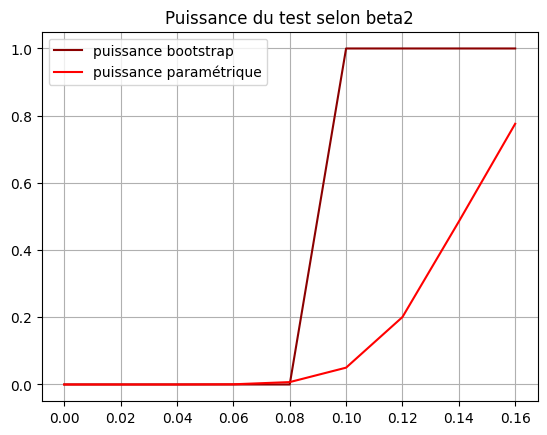

In [111]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power_boot, label = "puissance bootstrap", color = "darkred")
plt.plot(beta2_values, power, label = "puissance paramétrique", color = "red")
plt.grid()
plt.legend()
plt.show()

### Permutation test

In [ ]:
def power_simulation_with_permutation(n_permutations=1000):
    np.random.seed(42)
    n = 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    permutation_p_values = []
    
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:
        y_train = beta1 * x_train + beta2 * x_train ** 2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test ** 2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a1) ** 2

        # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train ** 2))
        x_test_quad = np.column_stack((x_test, x_test ** 2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test - y_pred_a2) ** 2

        diff = pa - pb
        d_barre = np.mean(diff)
        se = np.std(diff) / (m ** 0.5)
        test_stat = d_barre / se

        perm_stats = []
        for _ in range(n_permutations):
            perm_indices = np.random.permutation(m)
            perm_diff = pa[perm_indices] - pb[perm_indices]
            perm_d_barre = np.mean(perm_diff)
            perm_stats.append(perm_d_barre / se)

        perm_stats = np.array(perm_stats)
        p_value = (np.sum(perm_stats >= test_stat) + 1) / (n_permutations + 1)
        permutation_p_values.append(p_value)  
        puissance =  np.mean(np.array(permutation_p_values) < 0.05)

        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return standard_errors, test_statistics, power, permutation_p_values

standard_errors_perm, test_statistics_perm, power_perm, permutation_p_values = power_simulation_with_permutation()

print("Standard Errors:", standard_errors)
print("Test Statistics:", test_statistics)
print("Power:", power_perm)
print("Permutation P-values:", permutation_p_values)


In [108]:
def power_simulation_with_permutation_2(n_permutations=1000):
    np.random.seed(42)
    n = 150
    m = 2000
    power = []
    power_perm = []
    standard_errors = []
    test_statistics = []
    permutation_p_values = []
    
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:
        y_train = beta1 * x_train + beta2 * x_train ** 2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test ** 2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a1) ** 2

        # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train ** 2))
        x_test_quad = np.column_stack((x_test, x_test ** 2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test - y_pred_a2) ** 2

        diff = pa - pb
        d_barre = np.mean(diff)
        se = np.std(diff) / (m ** 0.5)
        test_stat = d_barre / se

        perm_stats = []
        for _ in range(n_permutations):
            perm_indices = np.random.permutation(m)
            perm_diff = pa[perm_indices] - pb
            perm_d_barre = np.mean(perm_diff)
            perm_stats.append(perm_d_barre / se)

        perm_stats = np.array(perm_stats)

        p_value = (np.sum(perm_stats >= test_stat) + 1) / (n_permutations + 1)
        permutation_p_values.append(p_value)


        perm_student = stats.t.ppf(0.95, df=m-1)
        perm_test_alt = perm_student - perm_stats
        perm_puissance = 1 - stats.norm.cdf(perm_test_alt, 0, 1)

        power_perm.append(np.mean(perm_puissance))

        standard_errors.append(se)
        test_statistics.append(test_stat)

    return standard_errors, test_statistics, power_perm, permutation_p_values

standard_errors_perm_2, test_statistics_perm_2, power_perm_2, permutation_p_values_2 = power_simulation_with_permutation_2()

print("Standard Errors:", standard_errors_perm_2)
print("Test Statistics:", test_statistics_perm_2)
print("Power (Permutation):", power_perm_2)
print("Permutation P-values:", permutation_p_values_2)

Standard Errors: [0.007724503687533174, 0.009460719201810157, 0.01120244172585826, 0.012951381596032516, 0.014709238570989542, 0.016477699128963595, 0.01825843385151428, 0.02005309491021282, 0.021863313671305225]
Test Statistics: [-4.056444277044139, -3.2432040637045767, -2.430003857926712, -1.6176513350658734, -0.8069467536879653, 0.0013209147015453993, 0.8063777122010404, 1.6074682375883356, 2.40385897000896]
Power (Permutation): [5.918389112125055e-09, 5.072101761927073e-07, 2.294594387564075e-05, 0.000550677392535226, 0.007092126911732759, 0.050057606397363105, 0.2006677332492435, 0.4847848361120924, 0.7758471550081736]
Permutation P-values: [0.3676323676323676, 0.5824175824175825, 0.7122877122877123, 0.6883116883116883, 0.5774225774225774, 0.5464535464535465, 0.5734265734265734, 0.46253746253746253, 0.8241758241758241]


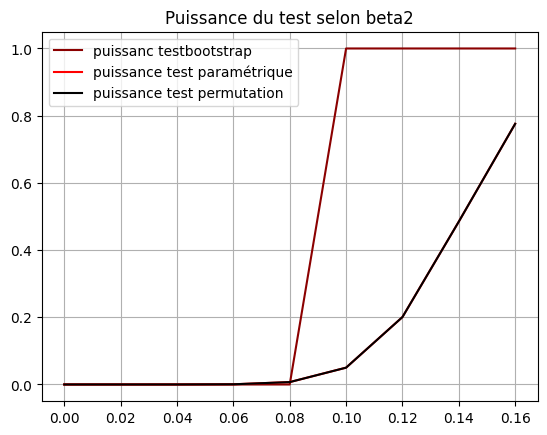

In [109]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power_boot, label = "puissanc testbootstrap", color = "darkred")
plt.plot(beta2_values, power, label = "puissance test paramétrique", color = "red")
plt.plot(beta2_values, power_perm_2, label = "puissance test permutation 2", color = "black")
plt.grid()
plt.legend()
plt.show()

### Non parametric testing

In [ ]:
from scipy.stats import wilcoxon

def power_simulation_with_wilcoxon():
    np.random.seed(42)
    n = 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    wilcoxon_p_values = []
    
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:
        y_train = beta1 * x_train + beta2 * x_train ** 2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test ** 2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a1) ** 2

        # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train ** 2))
        x_test_quad = np.column_stack((x_test, x_test ** 2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test - y_pred_a2) ** 2

        diff = pa - pb
        d_barre = np.mean(diff)
        se = np.std(diff) / (m ** 0.5)
        test_stat = d_barre / se

        wilcoxon_stat, p_value = wilcoxon(diff)
        wilcoxon_p_values.append(p_value)

        puissance = np.mean(np.array(wilcoxon_p_values) < 0.05)
        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return standard_errors, test_statistics, power, wilcoxon_p_values

standard_errors_wil, test_statistics_wil, power_wil, wilcoxon_p_values = power_simulation_with_wilcoxon()

print("Standard Errors:", standard_errors_wil)
print("Test Statistics:", test_statistics_wil)
print("Power:", power_wil)
print("Wilcoxon P-values:", wilcoxon_p_values)


In [ ]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power_boot, label = "puissanc testbootstrap", color = "darkred")
plt.plot(beta2_values, power, label = "puissance test paramétrique", color = "red")
plt.plot(beta2_values, power_perm, label = "puissance test permutation", color = "black")
plt.plot(beta2_values, power_wil, label = "puissance test non param", color = "blue")
plt.grid()
plt.legend()
plt.show()